<a href="https://colab.research.google.com/github/Shalinda99/fyp-HFI-module/blob/main/Fyp_204200A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **204200A FYP-Return and Risk Assessment Using Historical Financial Indicators of Stock Module**

In [ ]:
#204200A FYP-Return and Risk Assessment Using Historical Financial Indicators of Stock module
# importing the neccessary packages
import numpy as np
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize


# Upload the file
uploaded = files.upload()


# Load the dataset
df = pd.read_csv('SP_SL_20_dataset_final.csv')
df
print("Dataset Overview:")
print(df.head())

Saving SP_SL_20_dataset_final.csv to SP_SL_20_dataset_final.csv
Dataset Overview:
  Trade Date  Open (Rs.)  High (Rs.)  Low (Rs.)  Close (Rs.)  TradeVolume  \
0  1/31/2025      120.75       121.5     119.00       119.50          523   
1  1/30/2025      119.75       120.5     118.75       120.00          587   
2  1/29/2025      122.00       122.0     118.50       119.25         1354   
3  1/28/2025      122.00       122.5     121.00       121.25          838   
4  1/27/2025      122.00       123.0     121.50       122.00          694   

   ShareVolume  Turnover (Rs.)      Company Name  Stock Return  
0      1016885     122167426.0  SAMPATH BANK PLC           NaN  
1      1279402     152615285.3  SAMPATH BANK PLC           NaN  
2      2563188     307574122.8  SAMPATH BANK PLC           NaN  
3       990361     120261351.3  SAMPATH BANK PLC           NaN  
4       895710     109462379.0  SAMPATH BANK PLC           NaN  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23630 entries, 0 to 23629
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Trade Date      23630 non-null  object 
 1   Open (Rs.)      23615 non-null  float64
 2   High (Rs.)      23628 non-null  float64
 3   Low (Rs.)       23602 non-null  float64
 4   Close (Rs.)     23630 non-null  float64
 5   TradeVolume     23630 non-null  int64  
 6   ShareVolume     23630 non-null  int64  
 7   Turnover (Rs.)  23630 non-null  float64
 8   Company Name    23630 non-null  object 
 9   Stock Return    0 non-null      float64
dtypes: float64(6), int64(2), object(2)
memory usage: 1.8+ MB


In [ ]:
df.describe()

,Open (Rs.),High (Rs.),Low (Rs.),Close (Rs.),TradeVolume,ShareVolume,Turnover (Rs.),Stock Return
count,23615.000000,23628.000000,23602.00000,23630.000000,23630.000000,2.363000e+04,2.363000e+04,0.0
mean,101.015037,102.543817,99.19836,100.713468,237.930470,9.457623e+05,5.099489e+07,NaN
std,132.749618,135.066200,129.91949,132.184630,492.921403,5.459976e+06,2.379885e+08,NaN
min,2.200000,2.200000,2.20000,2.200000,1.000000,1.000000e+00,3.510000e+01,NaN
25%,37.000000,37.700000,36.00000,36.800000,49.000000,3.888300e+04,2.214817e+06,NaN
50%,67.900000,68.600000,66.50000,67.600000,109.000000,1.586455e+05,9.423298e+06,NaN
75%,107.750000,109.500000,106.00000,107.575000,245.000000,5.927495e+05,3.750844e+07,NaN
max,1455.000000,1489.000000,1400.25000,1443.250000,20945.000000,5.102825e+08,2.311574e+10,NaN


**Feature Correlation Heat Map**

                Open (Rs.)  High (Rs.)  Low (Rs.)  Close (Rs.)  TradeVolume  \
Open (Rs.)        1.000000    0.999472   0.999405     0.999284     0.049499   
High (Rs.)        0.999472    1.000000   0.998943     0.999590     0.056342   
Low (Rs.)         0.999405    0.998943   1.000000     0.999468     0.044140   
Close (Rs.)       0.999284    0.999590   0.999468     1.000000     0.051043   
TradeVolume       0.049499    0.056342   0.044140     0.051043     1.000000   
ShareVolume      -0.061469   -0.060294  -0.062165    -0.061140     0.513119   
Turnover (Rs.)    0.080167    0.084224   0.078598     0.082449     0.436528   
Stock Return           NaN         NaN        NaN          NaN          NaN   

                ShareVolume  Turnover (Rs.)  Stock Return  
Open (Rs.)        -0.061469        0.080167           NaN  
High (Rs.)        -0.060294        0.084224           NaN  
Low (Rs.)         -0.062165        0.078598           NaN  
Close (Rs.)       -0.061140        0.082449     

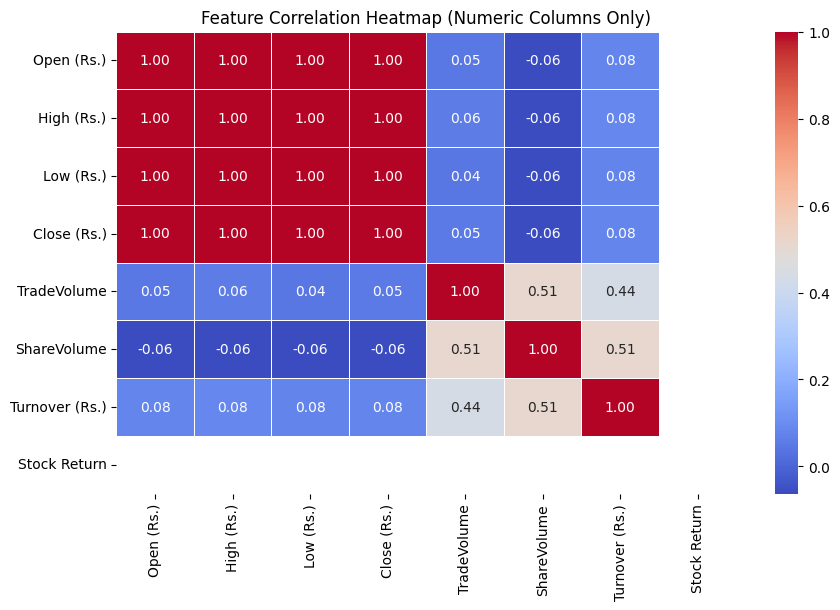

In [ ]:
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix using only numeric data
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap (Numeric Columns Only)")
plt.show()


**Checking Missing Values and Handling Missing Values**

In [ ]:
# checking null values
print("Before Handling Missing Values:\n")
print(df.isna().sum())

# Define the list of columns that contain numeric data to interpolate.
cols_to_fill = ['Open (Rs.)', 'High (Rs.)', 'Low (Rs.)', 'Close (Rs.)', 'TradeVolume', 'ShareVolume', 'Turnover (Rs.)']

# Now apply linear interpolation on these columns.
df[cols_to_fill] = df[cols_to_fill].interpolate(method='linear')

# Verify missing values have been handled
print("\nAfter Handling Missing Values:\n")
print(df[cols_to_fill].isnull().sum())



Before Handling Missing Values:

Trade Date            0
Open (Rs.)           15
High (Rs.)            2
Low (Rs.)            28
Close (Rs.)           0
TradeVolume           0
ShareVolume           0
Turnover (Rs.)        0
Company Name          0
Stock Return      23630
dtype: int64

After Handling Missing Values:

Open (Rs.)        0
High (Rs.)        0
Low (Rs.)         0
Close (Rs.)       0
TradeVolume       0
ShareVolume       0
Turnover (Rs.)    0
dtype: int64


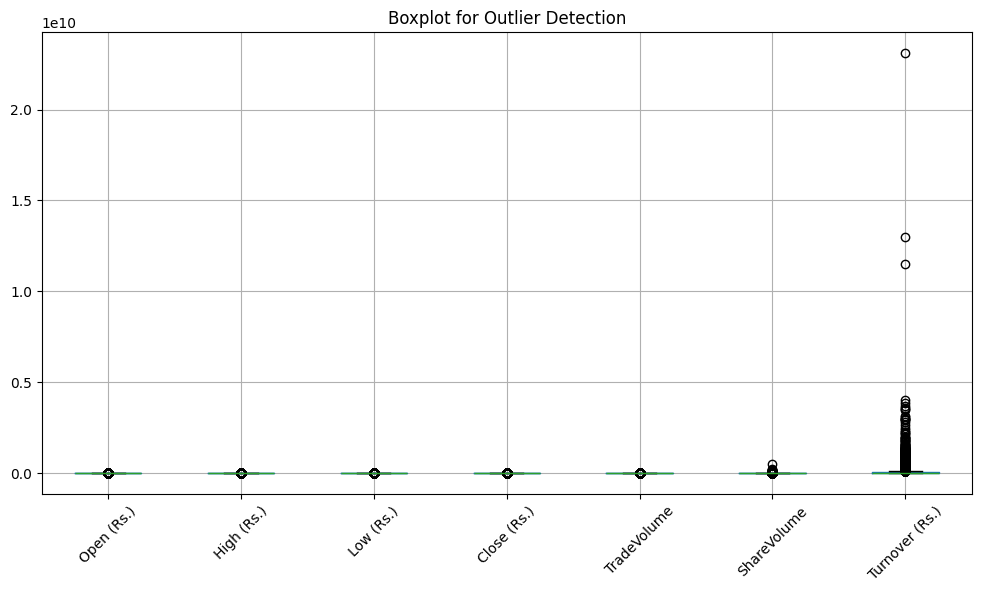

In [ ]:
# Define numerical columns
numerical_cols = ['Open (Rs.)', 'High (Rs.)', 'Low (Rs.)', 'Close (Rs.)', 'TradeVolume', 'ShareVolume', 'Turnover (Rs.)']

# Boxplot to visualize outliers
plt.figure(figsize=(12,6))
df[numerical_cols].boxplot(rot=45)  # Rotate labels for readability
plt.title("Boxplot for Outlier Detection")
plt.show()


In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1  # Interquartile Range

# Define outliers as values beyond 1.5 * IQR
outliers = (df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))
print("Number of outliers per column:")
print(outliers.sum())  # Count number of outliers per column


Number of outliers per column:
Open (Rs.)        1727
High (Rs.)        1727
Low (Rs.)         1717
Close (Rs.)       1729
TradeVolume       2318
ShareVolume       2957
Turnover (Rs.)    2967
dtype: int64


Outliers handled using Winsorization.


Text(0.5, 1.0, 'After Handling Outliers')

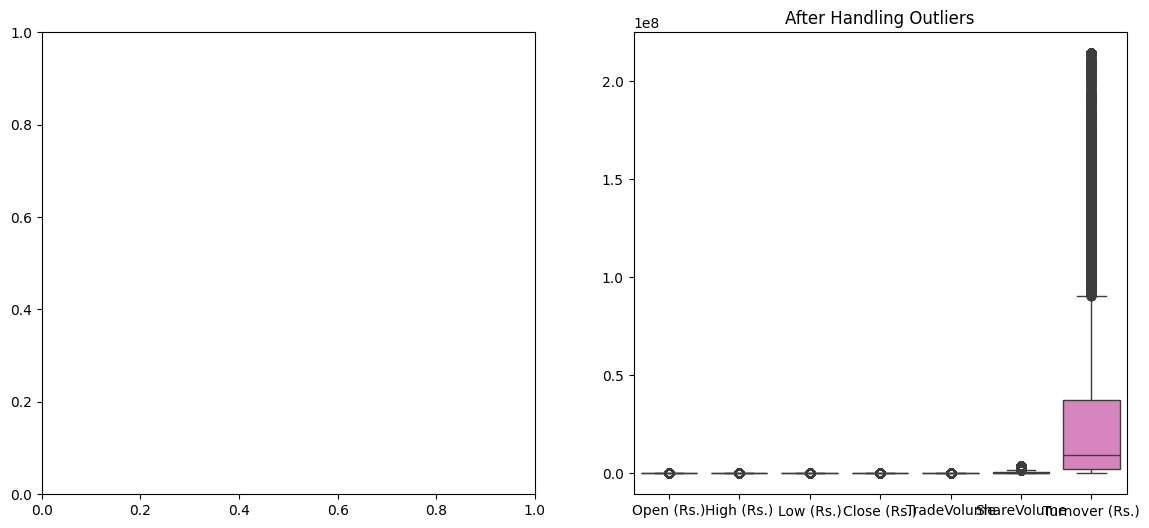

In [ ]:
# Apply winsorization (limits extreme values to 5th and 95th percentiles)
df_winsorized = df.copy()
for col in numerical_cols:
    df_winsorized[col] = winsorize(df[col], limits=[0.05, 0.05])
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
print("Outliers handled using Winsorization.")

sns.boxplot(data=df_winsorized[numerical_cols], ax=axes[1])
axes[1].set_title("After Handling Outliers")


# **Calculate Stock Return Value**

In [ ]:
df = pd.read_csv('SP_SL_20_dataset_final.csv')

df['Trade Date'] = pd.to_datetime(df['Trade Date'])

df['Stock Return'] = df.groupby('Company Name').apply(
    lambda group: np.log(group['Close (Rs.)'] / group['Close (Rs.)'].shift(1))
).reset_index(level=0, drop=True)

print(df)

df.to_csv('updated_stock_returns.csv', index=False)


<ipython-input-11-a69f099832ef>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df['Stock Return'] = df.groupby('Company Name').apply(


      Trade Date  Open (Rs.)  High (Rs.)  Low (Rs.)  Close (Rs.)  TradeVolume  \
0     2025-01-31      120.75       121.5     119.00       119.50          523   
1     2025-01-30      119.75       120.5     118.75       120.00          587   
2     2025-01-29      122.00       122.0     118.50       119.25         1354   
3     2025-01-28      122.00       122.5     121.00       121.25          838   
4     2025-01-27      122.00       123.0     121.50       122.00          694   
...          ...         ...         ...        ...          ...          ...   
23625 2020-01-08       70.00        70.0      67.00        67.50          244   
23626 2020-01-07       74.00        74.0      68.00        70.20          209   
23627 2020-01-06       74.40        75.0      73.40        73.60           89   
23628 2020-01-03       75.00        75.0      74.30        74.80           72   
23629 2020-01-02       75.40        75.4      74.50        74.50           60   

       ShareVolume  Turnove

### **Calculate VaR**

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm

# Load the dataset
df = pd.read_csv('SP_SL_20_dataset_final.csv')

df['Trade Date'] = pd.to_datetime(df['Trade Date'])

# Calculate log returns for each company
df['Stock Return'] = df.groupby('Company Name').apply(
    lambda group: np.log(group['Close (Rs.)'] / group['Close (Rs.)'].shift(1))
).reset_index(level=0, drop=True)

# Define confidence level and corresponding Z-score
confidence_level = 0.95  # 95% confidence level
z_score = norm.ppf(1 - confidence_level)

# Calculate mean and standard deviation of returns for each company
df['Mean Return'] = df.groupby('Company Name')['Stock Return'].transform(lambda x: x.mean())
df['Volatility'] = df.groupby('Company Name')['Stock Return'].transform(lambda x: x.std())

# Compute VaR using the formula: VaR = μ - Z * σ
df['Value at Risk (95%)'] = df['Mean Return'] - (z_score * df['Volatility'])

# Select and reorder columns for final display
columns_order = ['Trade Date', 'Open (Rs.)', 'High (Rs.)', 'Low (Rs.)', 'Close (Rs.)', 'TradeVolume',
                 'ShareVolume', 'Turnover (Rs.)', 'Company Name', 'Stock Return', 'Value at Risk (95%)']
df = df[columns_order]

# Save the updated dataset
df.to_csv('updated_stock_returns.csv', index=False)

print("Updated dataset with VaR saved as 'updated_stock_returns.csv'")

# Display first few rows for verification
print(df.head())
from google.colab import files

# Download the updated file
files.download("/content/updated_stock_returns.csv")


<ipython-input-12-dfe4c2cba8fb>:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df['Stock Return'] = df.groupby('Company Name').apply(


Updated dataset with VaR saved as 'updated_stock_returns.csv'
  Trade Date  Open (Rs.)  High (Rs.)  Low (Rs.)  Close (Rs.)  TradeVolume  \
0 2025-01-31      120.75       121.5     119.00       119.50          523   
1 2025-01-30      119.75       120.5     118.75       120.00          587   
2 2025-01-29      122.00       122.0     118.50       119.25         1354   
3 2025-01-28      122.00       122.5     121.00       121.25          838   
4 2025-01-27      122.00       123.0     121.50       122.00          694   

   ShareVolume  Turnover (Rs.)      Company Name  Stock Return  \
0      1016885     122167426.0  SAMPATH BANK PLC           NaN   
1      1279402     152615285.3  SAMPATH BANK PLC      0.004175   
2      2563188     307574122.8  SAMPATH BANK PLC     -0.006270   
3       990361     120261351.3  SAMPATH BANK PLC      0.016632   
4       895710     109462379.0  SAMPATH BANK PLC      0.006167   

   Value at Risk (95%)  
0             0.064567  
1             0.064567  
2  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

# Traditional Parametric VaR (95%)
confidence_level = 0.95
z_score = norm.ppf(1 - confidence_level)

df['Mean Return'] = df.groupby('Company Name')['Stock Return'].transform(lambda x: x.mean())
df['Volatility'] = df.groupby('Company Name')['Stock Return'].transform(lambda x: x.std())
df['Value at Risk (95%)'] = df['Mean Return'] - (z_score * df['Volatility'])

# EVT-based VaR for each company
def calculate_evt_var(group):
    returns = group['Stock Return'].dropna()
    if len(returns) < 30:
        # Skip small groups
        group['VaR_EVT_95'] = np.nan
        group['VaR_EVT_99'] = np.nan
        return group

    threshold = np.percentile(returns, 5)
    tail_data = returns[returns < threshold]
    excesses = -(tail_data - threshold)  # Make positive for GPD

    if len(excesses) < 10:
        group['VaR_EVT_95'] = np.nan
        group['VaR_EVT_99'] = np.nan
        return group

    shape, loc, scale = genpareto.fit(excesses)
    n = len(returns)
    nu = len(excesses)

    def compute_evt_var(conf_level):
        q = 1 - conf_level
        return threshold - (scale / shape) * (((n * q) / nu) ** (-shape) - 1)

    group['VaR_EVT_95'] = compute_evt_var(0.95)
    group['VaR_EVT_99'] = compute_evt_var(0.99)
    return group

df = df.groupby('Company Name').apply(calculate_evt_var)

# Final column order
columns_order = ['Trade Date', 'Open (Rs.)', 'High (Rs.)', 'Low (Rs.)', 'Close (Rs.)', 'TradeVolume',
                 'ShareVolume', 'Turnover (Rs.)', 'Company Name', 'Stock Return',
                 'Value at Risk (95%)', 'VaR_EVT_95', 'VaR_EVT_99']
df = df[columns_order]

# Save updated CSV
df.to_csv('updated_with_evt_var.csv', index=False)

print("Updated dataset with traditional and EVT VaR saved as 'updated_with_evt_var.csv'")

files.download('updated_with_evt_var.csv')



<ipython-input-14-9988165339bf>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df['Stock Return'] = df.groupby('Company Name').apply(
<ipython-input-14-9988165339bf>:52: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Company Name').apply(calculate_evt_var)


Updated dataset with traditional and EVT VaR saved as 'updated_with_evt_var.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

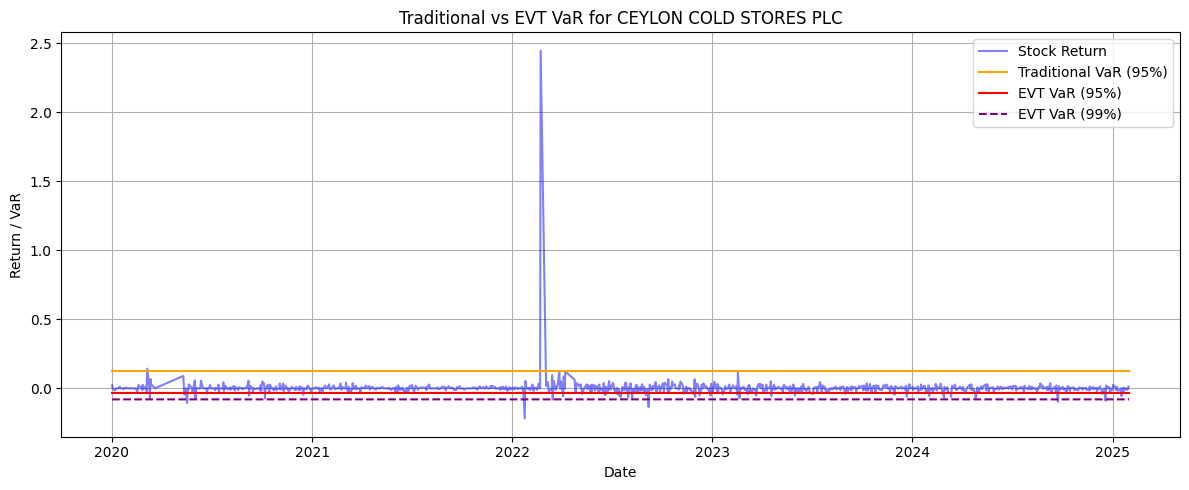

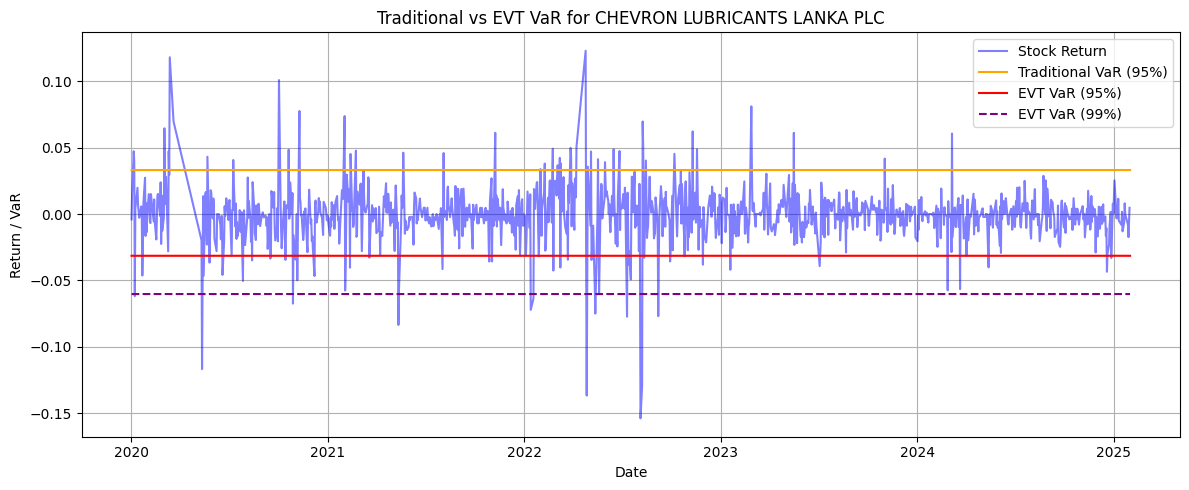

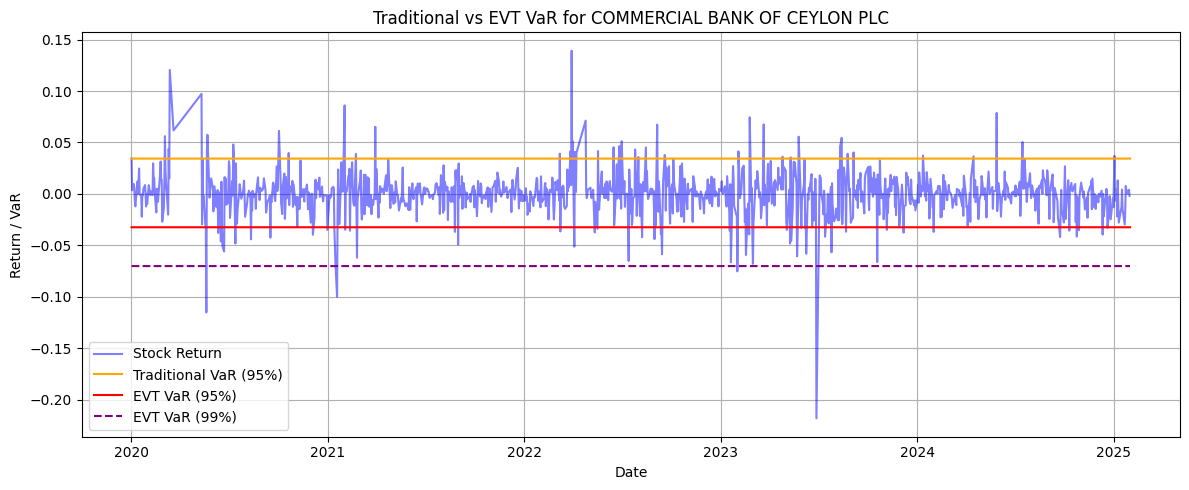

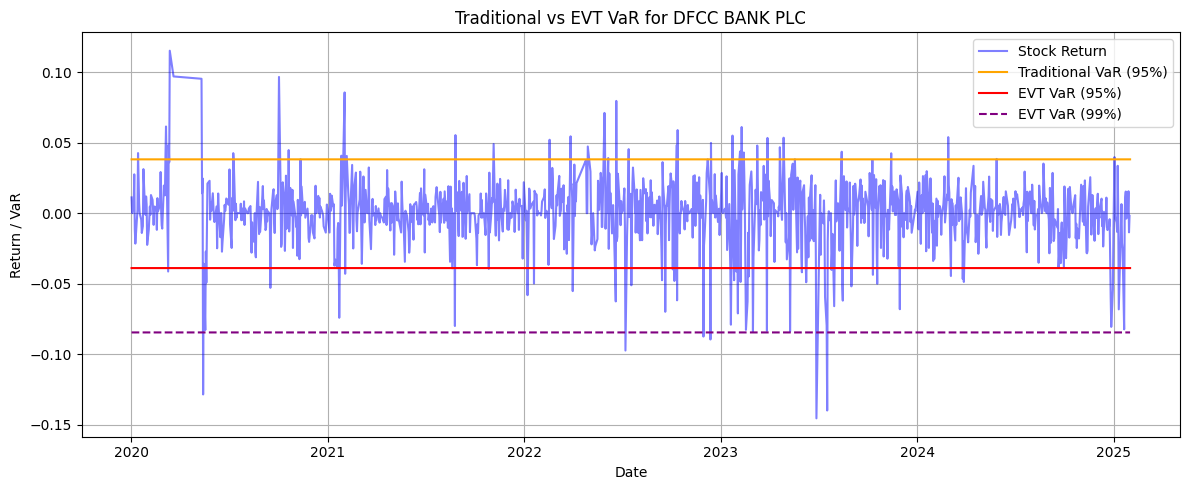

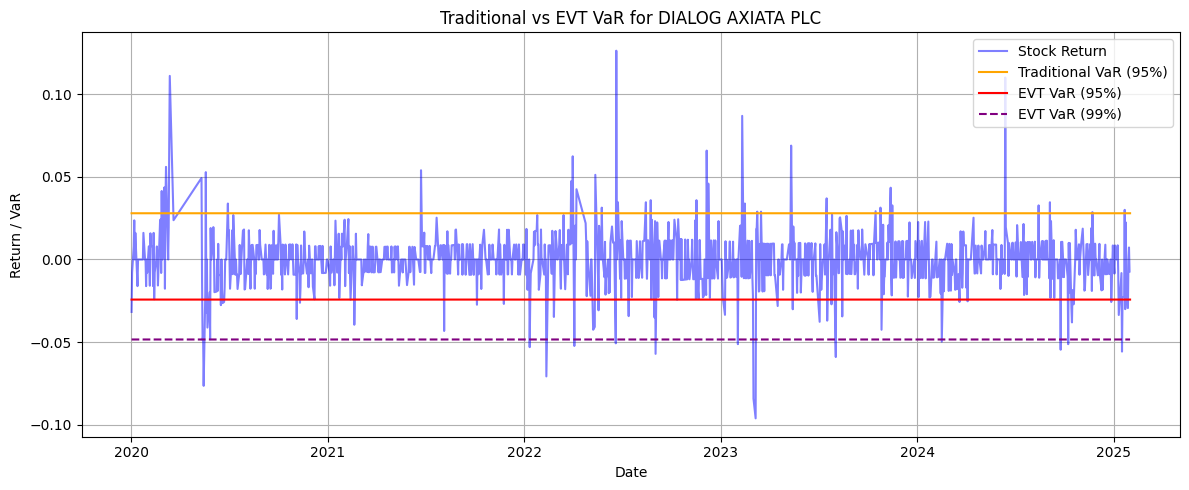

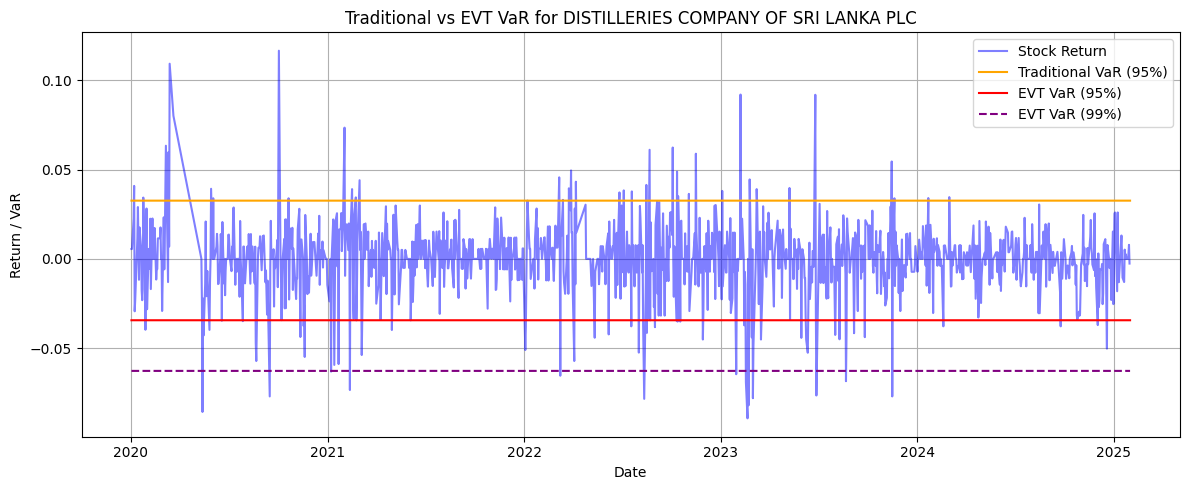

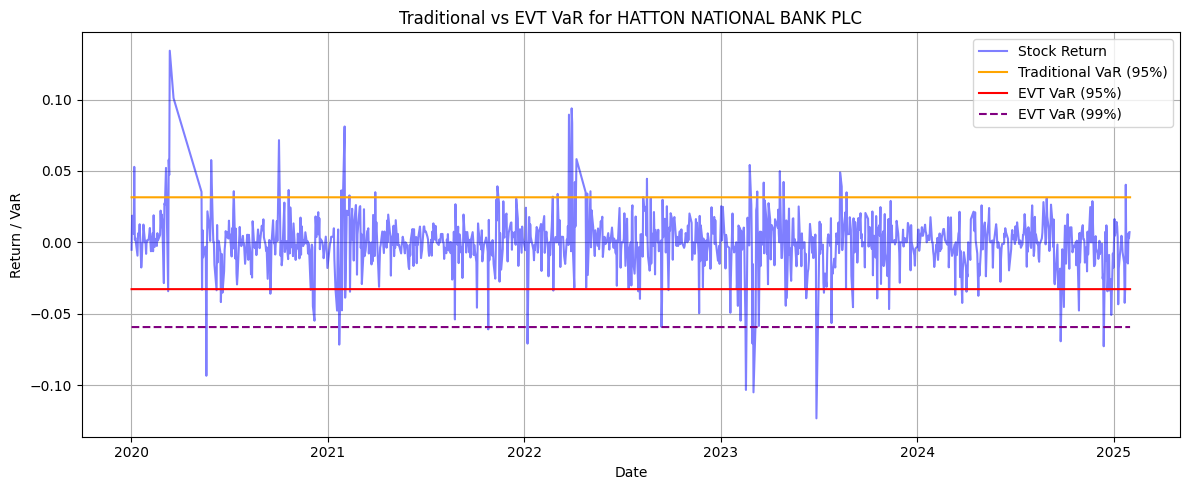

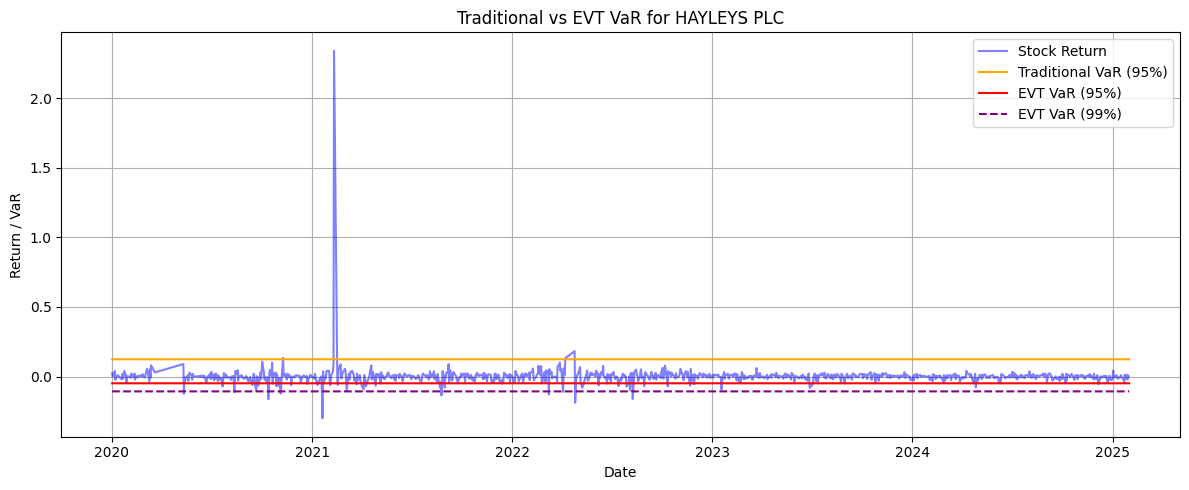

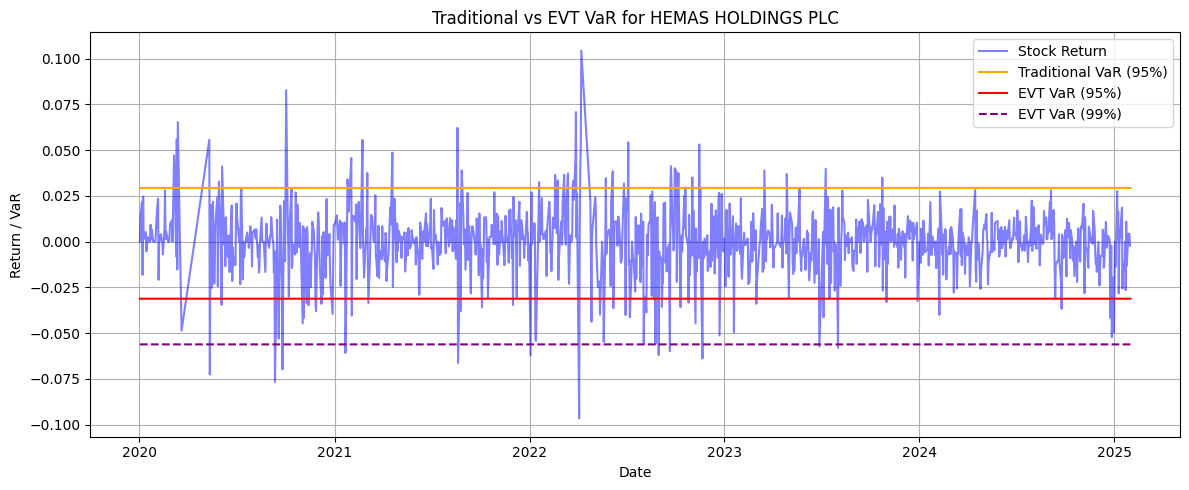

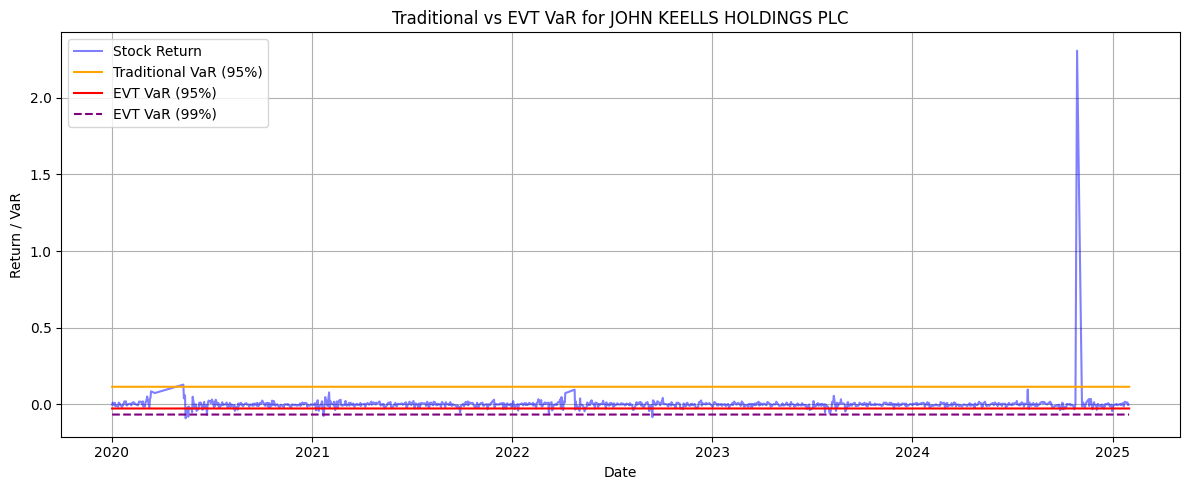

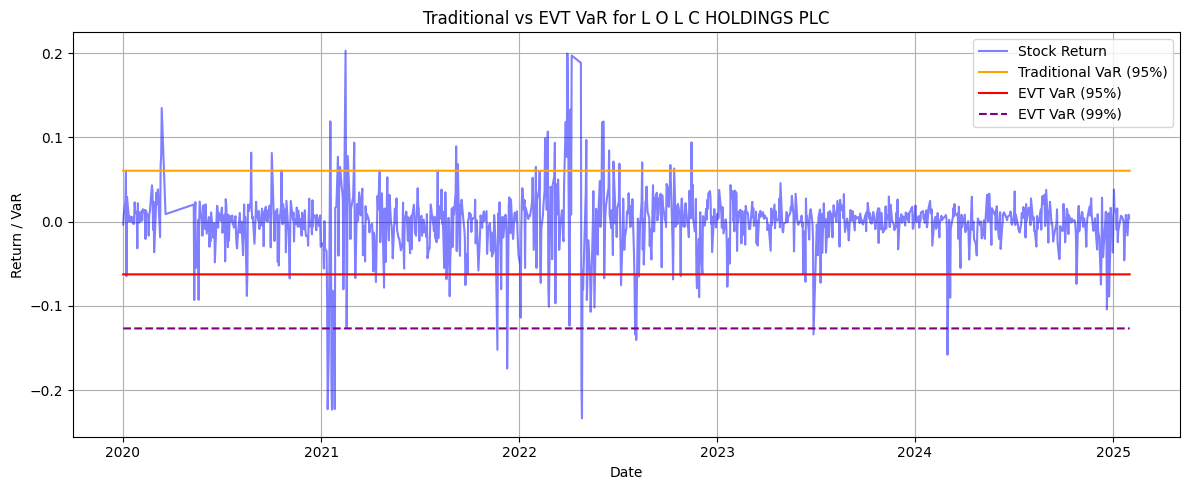

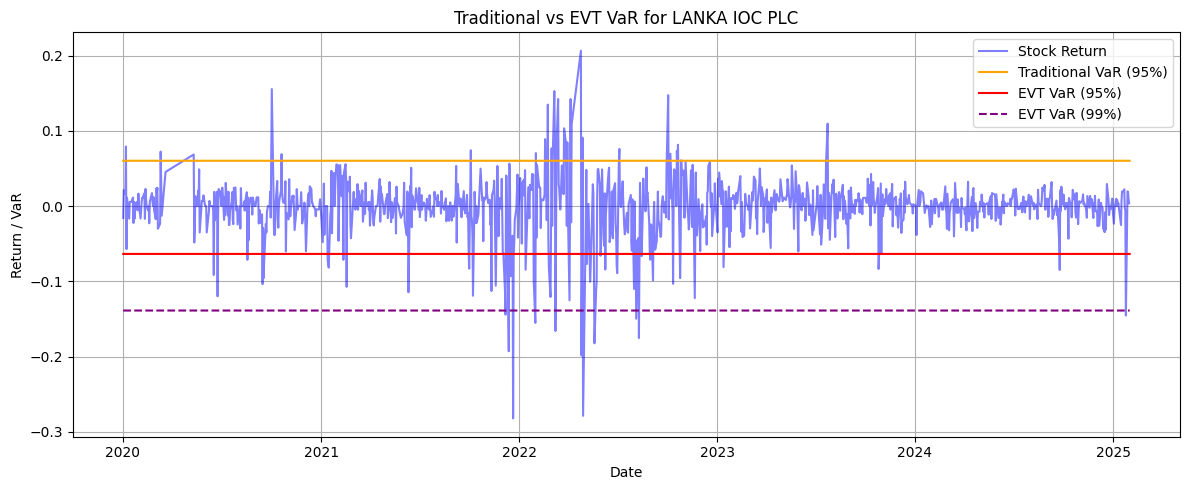

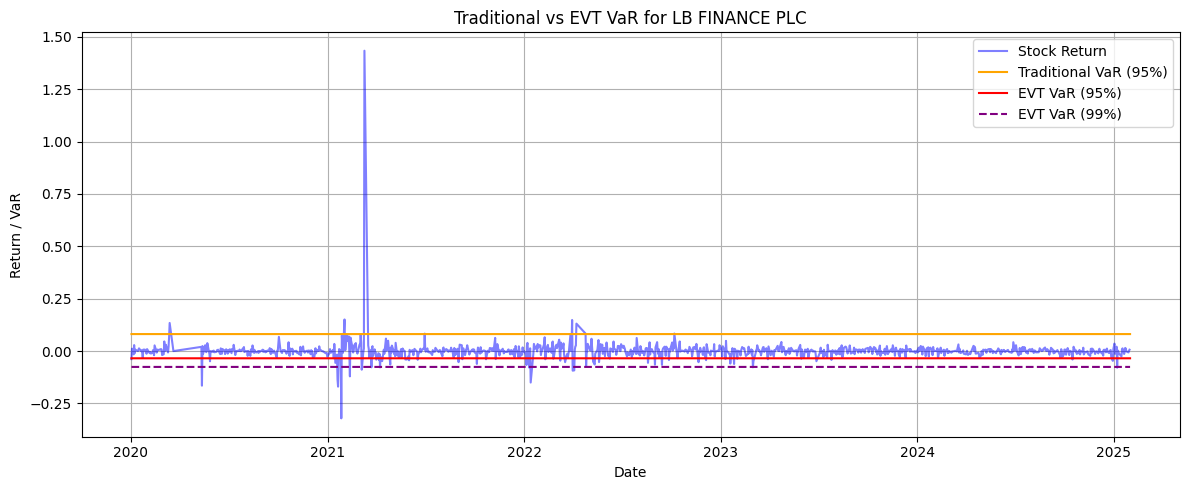

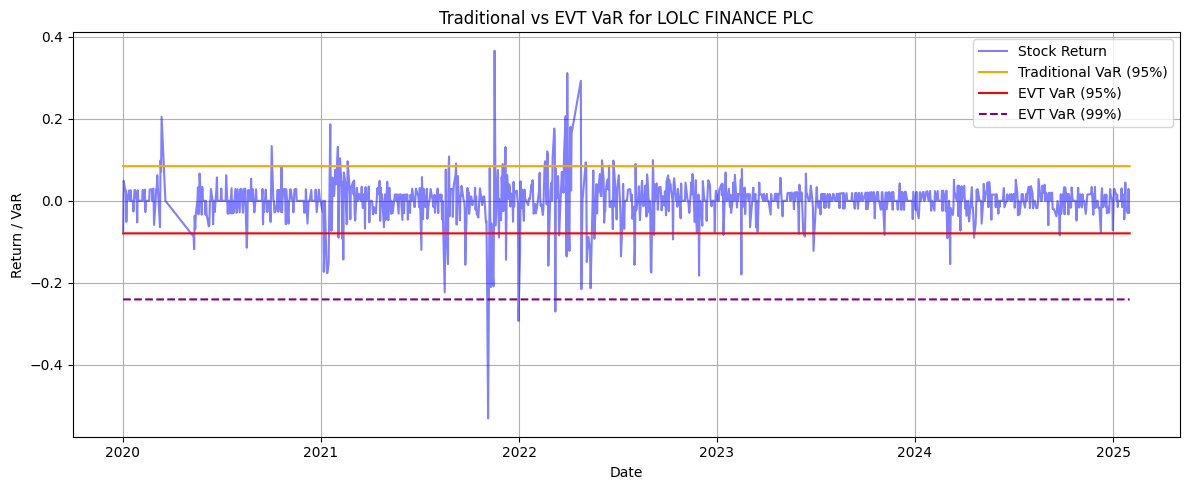

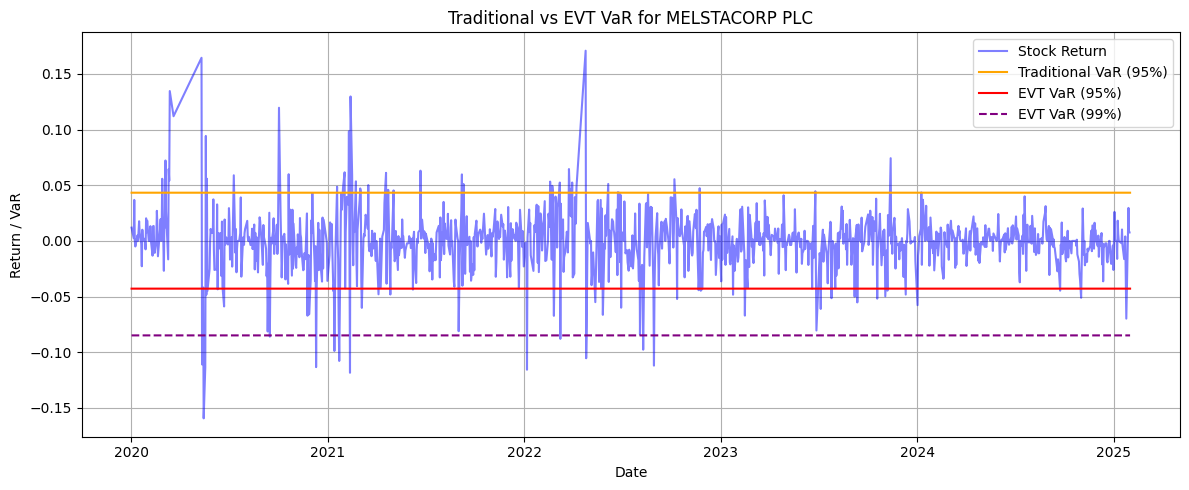

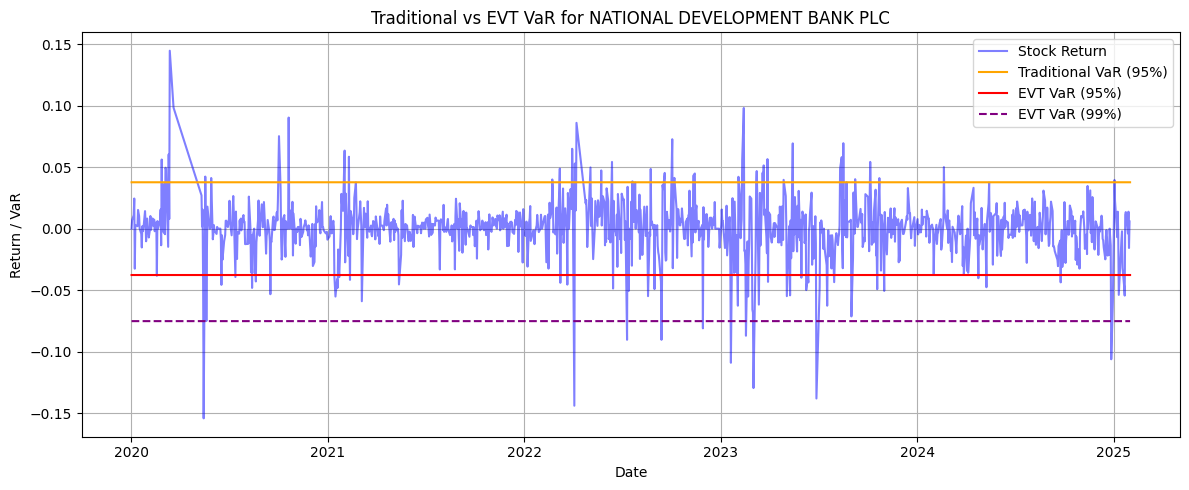

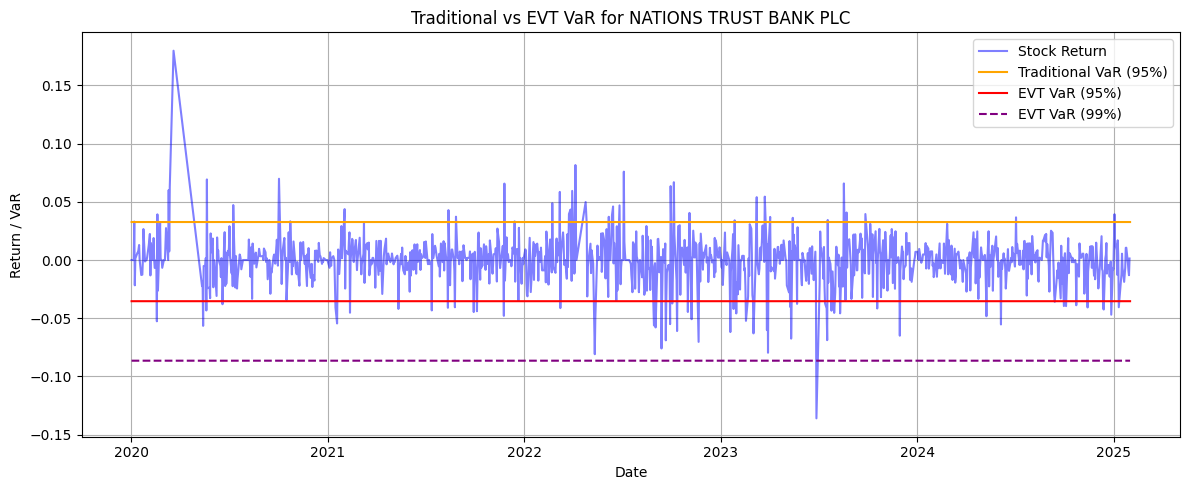

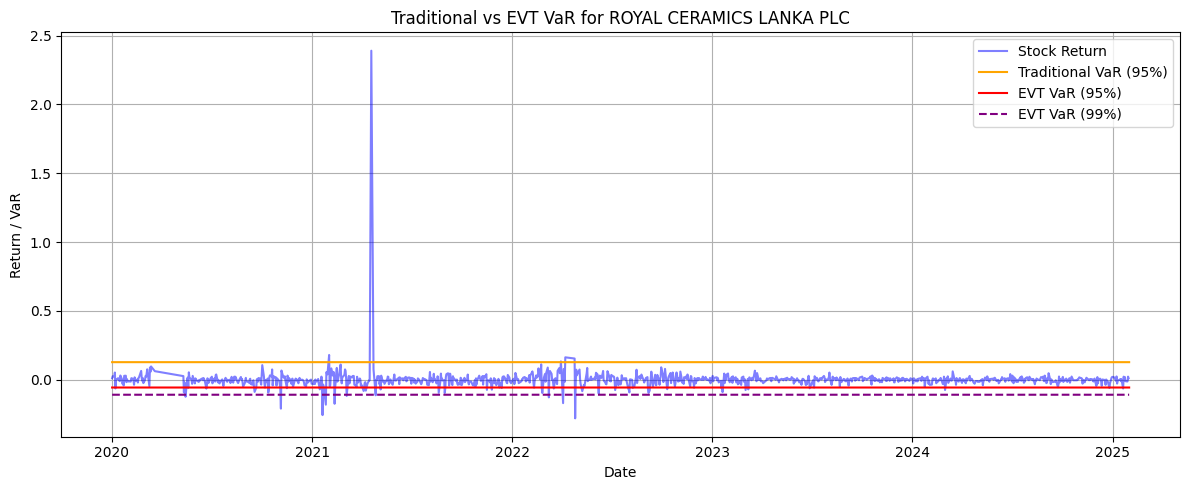

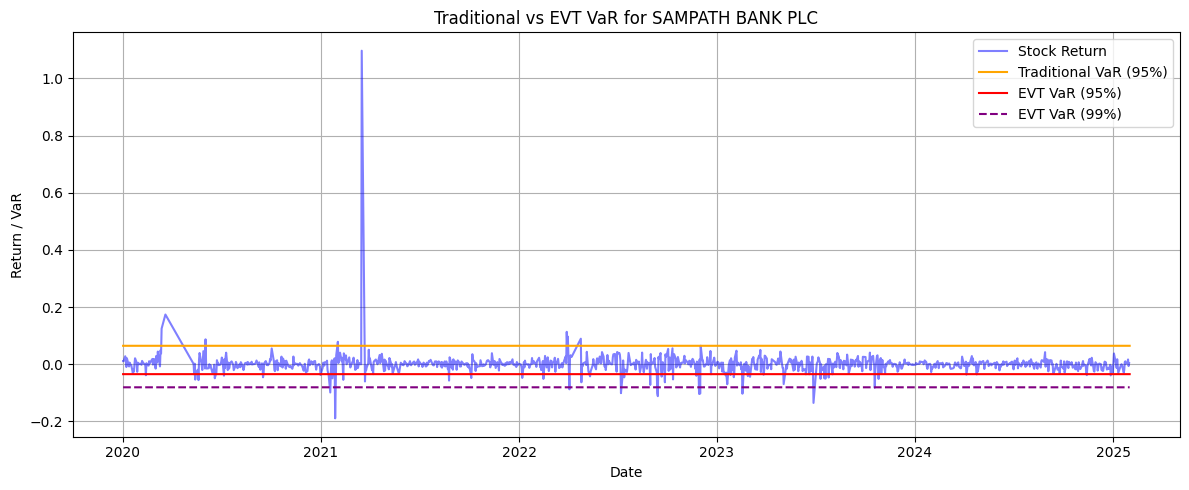

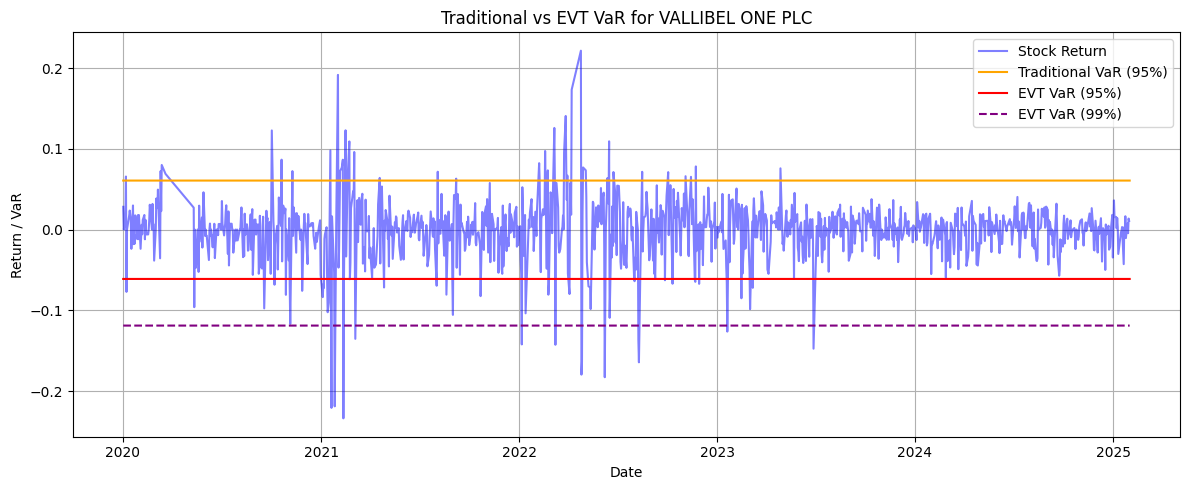

In [ ]:
unique_companies = df['Company Name'].unique()

for company in unique_companies:
    company_df = df[df['Company Name'] == company].copy()
    company_df = company_df.sort_values('Trade Date')

    plt.figure(figsize=(12, 5))
    plt.plot(company_df['Trade Date'], company_df['Stock Return'], label='Stock Return', color='blue', alpha=0.5)
    plt.plot(company_df['Trade Date'], company_df['Value at Risk (95%)'], label='Traditional VaR (95%)', color='orange')
    plt.plot(company_df['Trade Date'], company_df['VaR_EVT_95'], label='EVT VaR (95%)', color='red')
    plt.plot(company_df['Trade Date'], company_df['VaR_EVT_99'], label='EVT VaR (99%)', color='purple', linestyle='--')

    plt.title(f'Traditional vs EVT VaR for {company}')
    plt.xlabel('Date')
    plt.ylabel('Return / VaR')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
